Title: Mileage Predection

Objective: A Mileage Prediction machine learning project aims to predict the fuel mileage or gas mileage of a vehicle based on various input features. The primary objective is to develop a model that can estimate how efficiently a vehicle uses fuel under different driving conditions and characteristics.

Data Source : Kaggle Dataset https://github.com/YBI-Foundation/Dataset/blob/main/MPG.csv

Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

Import Data

In [ ]:
data=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

Describe Data

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
data.shape

(398, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
data.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle mali

In [ ]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [ ]:
data.corr

<bound method DataFrame.corr of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu

Data Preprocessing: Null values to be handeled by imputation.

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
impute_mode=SimpleImputer(strategy="most_frequent")
impute_mode.fit(data[["horsepower"]])
data[["horsepower"]]=impute_mode.transform(data[["horsepower"]])

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Data Visualization

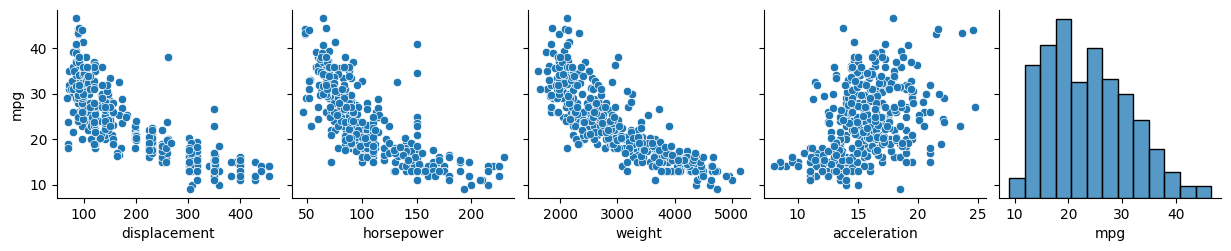

In [ ]:
sns.pairplot(data, x_vars= ['displacement','horsepower','weight','acceleration','mpg'], y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

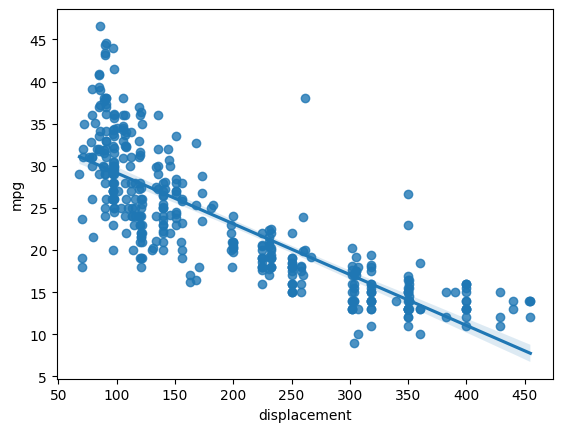

In [ ]:
sns.regplot(x= 'displacement',y= 'mpg',data=data)

Define Target Variable and Independent Variable

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
Y=data['mpg'].values
X=data.drop(['mpg','origin','name'],axis = 1).values

In [ ]:
X.shape

(398, 6)

In [ ]:
Y.shape

(398,)

Scaling the Data

In [ ]:
ss=StandardScaler()

In [ ]:
X=ss.fit_transform(X)

In [ ]:
X

array([[ 1.49819126,  1.0906037 ,  0.64442632,  0.63086987, -1.29549834,
        -1.62742629],
       [ 1.49819126,  1.5035143 ,  1.55228015,  0.85433297, -1.47703779,
        -1.62742629],
       [ 1.49819126,  1.19623199,  1.16319993,  0.55047045, -1.65857724,
        -1.62742629],
       ...,
       [-0.85632057, -0.56103873, -0.54875299, -0.79858454, -1.4407299 ,
         1.62198339],
       [-0.85632057, -0.70507731, -0.6784464 , -0.40841088,  1.10082237,
         1.62198339],
       [-0.85632057, -0.71467988, -0.60063036, -0.29608816,  1.39128549,
         1.62198339]])

In [ ]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-3.570567e-17,-1.785283e-17,-3.570567e-17,-1.606755e-16,-2.677925e-16,-1.642461e-15
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.534423e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00
25%,-8.563206e-01,-8.563178e-01,-7.562624e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01
50%,-8.563206e-01,-4.314040e-01,-2.634275e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03
75%,1.498191e+00,6.584879e-01,6.444263e-01,7.538337e-01,5.834349e-01,8.096310e-01
max,1.498191e+00,2.511784e+00,3.238294e+00,2.565185e+00,3.351912e+00,1.621983e+00


Splitting the data into test and train

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)


In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(ytest.shape)
print(ytrain.shape)

(278, 6)
(278,)
(120,)
(278,)


Model Selection :Linear Regression

In [ ]:
print(X)

[[ 1.49819126  1.0906037   0.64442632  0.63086987 -1.29549834 -1.62742629]
 [ 1.49819126  1.5035143   1.55228015  0.85433297 -1.47703779 -1.62742629]
 [ 1.49819126  1.19623199  1.16319993  0.55047045 -1.65857724 -1.62742629]
 ...
 [-0.85632057 -0.56103873 -0.54875299 -0.79858454 -1.4407299   1.62198339]
 [-0.85632057 -0.70507731 -0.6784464  -0.40841088  1.10082237  1.62198339]
 [-0.85632057 -0.71467988 -0.60063036 -0.29608816  1.39128549  1.62198339]]


In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
LR.intercept_

23.53353549616933

In [ ]:
LR.coef_

array([ 0.44491362, -0.64758205,  0.2585837 , -5.6408405 ,  0.28841573,
        2.93998788])

Mileage= 23.4-1.05Displacement-1.68Horsepower-4.10Weight-0.115Acceleration+error

Prediction

In [ ]:
ypred=LR.predict(xtest)

Model Evaluation

In [ ]:
mean_absolute_error(ytest,ypred)

2.5620828199750436

In [ ]:
mean_absolute_percentage_error(ytest,ypred)

0.1258968671906509

In [ ]:
r2_score(ytest,ypred)

0.8262929974151593

Polynomial Regression

In [ ]:
poly=PolynomialFeatures(degree=3, interaction_only=True,include_bias=False)

In [ ]:
xtrain1=poly.fit_transform(xtrain)
xtest1=poly.fit_transform(xtest)
LR.fit(xtrain1,ytrain)

LinearRegression()

In [ ]:
LR.intercept_

21.608710894177335

In [ ]:
LR.coef_

array([ 0.48273193, -1.33320039, -2.14113389, -4.33892663, -1.77983371,
        1.28643338, -2.87140138,  0.54238752,  0.453169  ,  2.08953698,
       -1.52011951,  1.00350455,  4.64878604, -4.29927408,  1.20547809,
       -2.61915492, -0.82144985, -0.37573939,  1.76990191, -0.67186567,
        0.69465094, -2.1869176 , -1.16168142,  0.85170895,  3.45661381,
        2.37431965, -3.60075667,  0.67189691,  0.11791975, -1.60807389,
       -1.55700793,  1.08014763,  3.89606543, -5.46461425, -0.10619909,
        0.85204459,  2.30818823, -0.11655108,  3.22391055, -1.64140123,
        0.48252729])

In [ ]:
ypredpoly=LR.predict(xtest1)

In [ ]:
mean_absolute_error(ytest,ypredpoly)

2.3705242000108275

In [ ]:
mean_absolute_percentage_error(ytest,ypredpoly)

0.1094004181648893

In [ ]:
r2_score(ytest,ypredpoly)

0.8356837767869856

Explanation: This project is a comprehensive Mileage Predictor machine learning endeavor, encompassing data visualization with Seaborn, meticulous data preprocessing using mode-based imputation, and the application of both linear and polynomial regression techniques. The project aims to provide users with a predictive tool for estimating vehicle fuel efficiency, allowing for more informed decisions and potentially reducing environmental impact.